# K-Means

- How do we define the middle of a set of points? There are actually
two things that we need to define:

__A distance measure__ In order to talk about distances between points, we need some way
to measure distances. It is often the normal Euclidean distance, but there are other
alternatives; we’ve covered some other alternatives in Section 7.2.3.

__The mean average__ Once we have a distance measure, we can compute the central point
of a set of datapoints, which is the mean average (if you aren’t convinced, think what
the mean of two numbers is, it is the point halfway along the line between them).
Actually, this is only true in Euclidean space, which is the one you are used to, where
everything is nice and flat. Everything becomes a lot trickier if we have to think about
curved spaces; when we have to worry about curvature, the Euclidean distance metric
isn’t the right one, and there are at least two different definitions of the mean. So we
aren’t going to worry about any of these things, and we’ll assume that space is flat.
This is what statisticians do all the time.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = 3, 2
mpl.rcParams['figure.dpi'] = 550
mpl.rcParams['font.size'] = 8

In [2]:
from sklearn import datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
labels = iris.target
target_ids = np.unique(labels)#labels = array([0, 1, 2])
data = X

## The K-Means Algorithm
- __Initialisation__
    - choose a value for k, which corresponds to the number of output nodes
    - initialise the weights to have small random values
    - assign the cluster centres $\mu_j$ to those positions

In [21]:
nData = np.shape(data)[0]
nDim = np.shape(data)[1]
k = 3

minima = data.min(axis=0)
maxima = data.max(axis=0)
	
# Pick the centre locations randomly
centres = np.random.rand(k,nDim)*(maxima-minima)+minima
oldCentres = np.random.rand(k,nDim)*(maxima-minima)+minima
count = 0

- Learning
    - repeat
        - for each datapoint $x_i$ :
         - compute the distance to each cluster centre
         - assign the datapoint to the nearest cluster centre with distance
         \begin{equation}
         d i = min d(x i , μ j ).
         \end{equation}

j
(14.1)
∗ for each cluster centre:
· move the position of the centre to the mean of the points in that cluster
(N j is the number of points in cluster j):
N j
1 X
x i
μ j =
N j i=1
(14.2)
– until the cluster centres stop moving

In [3]:
class kmeans:
	""" The k-Means algorithm"""
	def __init__(self,k,data):

		self.nData = np.shape(data)[0]
		self.nDim = np.shape(data)[1]
		self.k = k
		
	def kmeanstrain(self,data,maxIterations=100):
		
		# Find the minimum and maximum values for each feature
		minima = data.min(axis=0)
		maxima = data.max(axis=0)
	
		# Pick the centre locations randomly
		self.centres = np.random.rand(self.k,self.nDim)*(maxima-minima)+minima
		oldCentres = np.random.rand(self.k,self.nDim)*(maxima-minima)+minima
	
		count = 0
		#print centres
		while np.sum(np.sum(oldCentres-self.centres))!= 0 and count<maxIterations:
	
			oldCentres = self.centres.copy()
			count += 1
	
			# Compute distances
			distances = np.ones((1,self.nData))*np.sum((data-self.centres[0,:])**2,axis=1)
			for j in range(self.k-1):
				distances = np.append(distances,np.ones((1,self.nData))*np.sum((data-self.centres[j+1,:])**2,axis=1),axis=0)
	
			# Identify the closest cluster
			cluster = distances.argmin(axis=0)
			cluster = np.transpose(cluster*np.ones((1,self.nData)))
	
			# Update the cluster centres	
			for j in range(self.k):
				thisCluster = np.where(cluster==j,1,0)
				if sum(thisCluster)>0:
					self.centres[j,:] = np.sum(data*thisCluster,axis=0)/np.sum(thisCluster)
			#plot(data[:,0],data[:,1],'kx')
			#plot(centres[:,0],centres[:,1],'ro')
		return self.centres
	def kmeansfwd(self,data):
		
		nData = np.shape(data)[0]
		# Compute distances
		distances = np.ones((1,nData))*np.sum((data-self.centres[0,:])**2,axis=1)
		for j in range(self.k-1):
			distances = np.append(distances,np.ones((1,nData))*np.sum((data-self.centres[j+1,:])**2,axis=1),axis=0)
	
		# Identify the closest cluster
		cluster = distances.argmin(axis=0)
		cluster = np.transpose(cluster*np.ones((1,nData)))
	
		return cluster

In [4]:
kms = kmeans(3,data)
kms.kmeanstrain(data)

array([[5.006     , 3.418     , 1.464     , 0.244     ],
       [5.88360656, 2.74098361, 4.38852459, 1.43442623],
       [6.85384615, 3.07692308, 5.71538462, 2.05384615]])

In [5]:
kms.kmeansfwd(data).T

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 2., 1., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2.,
        2., 1., 1., 2., 2., 2., 2., 1., 2., 1., 2., 1., 2., 2., 1., 1.,
        2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 1., 2., 2., 2., 1., 2.,
        2., 2., 1., 2., 2., 1.]])

In [6]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, random_state = 0)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

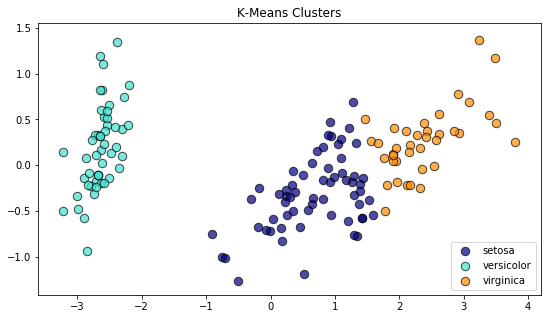

In [19]:
colors = ['navy', 'turquoise', 'darkorange']

X = iris.data
y = kms.kmeansfwd(data).T

from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(X)
y = kmeans.labels_

X_pca = pca.transform(X)

plt.figure(figsize=(9, 5))
for i, c, label in zip(target_ids, colors, iris.target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1],
               c=c, alpha=0.7, edgecolors='black', s=285,label=label, marker='.')
plt.title('K-Means Clusters')
plt.legend()
plt.show()

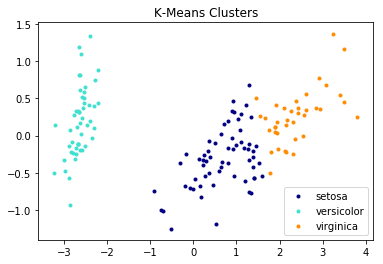

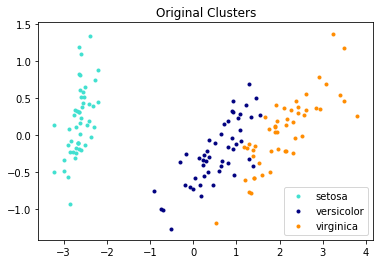

In [9]:
colors = ['navy', 'turquoise', 'darkorange']

X = iris.data
y = iris.target

from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(X)
y = kmeans.labels_

X_pca = pca.transform(X)

for i, c, label in zip(target_ids, colors, iris.target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1],
               c=c, label=label, marker='.')
plt.title('K-Means Clusters')
plt.legend()
plt.show()

colors = ['turquoise','navy',  'darkorange']

from sklearn.decomposition import PCA


y = iris.target
target_ids = np.unique(labels)#labels = array([0, 1, 2])
pca = PCA(n_components=2).fit(X)

X_pca = pca.transform(X)

for i, c, label in zip(target_ids, colors, iris.target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1],
               c=c, label=label, marker='.')
plt.title('Original Clusters')
plt.legend()
plt.show()